#### Corey Solitaire
##### 8/17/2020

### Seaborn Exercises

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exercises

#### Use the iris database to answer the following quesitons:

In [6]:
iris = sns.load_dataset('iris')

iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

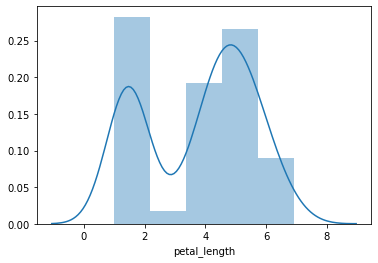

In [41]:
# 1. What does the distribution of petal lengths look like?

sns.distplot(iris.petal_length)
plt.show()

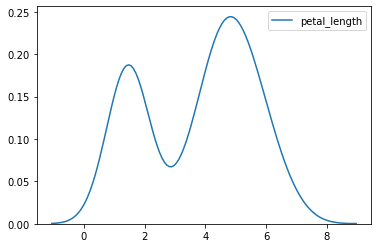

In [40]:
sns.kdeplot(iris.petal_length)
plt.show()

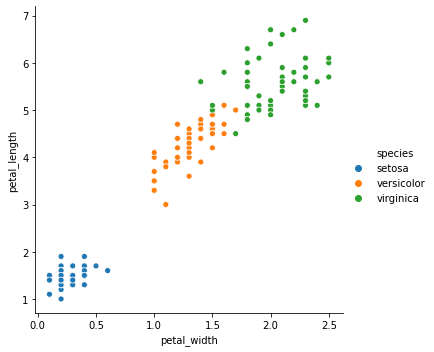

In [39]:
# 2. Is there a correlation between petal length and petal width?

sns.relplot(x = 'petal_width', y = 'petal_length', hue = 'species', data = iris)
plt.show()

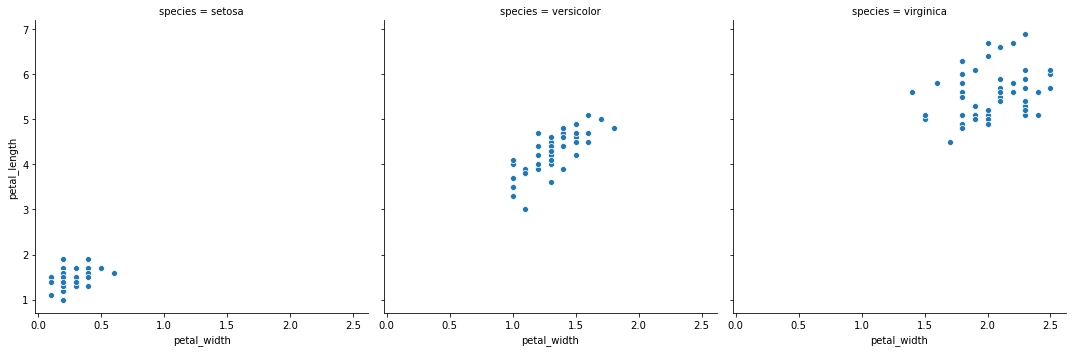

In [42]:
sns.relplot(x = 'petal_width', y = 'petal_length', col = 'species', data = iris,)
plt.show()

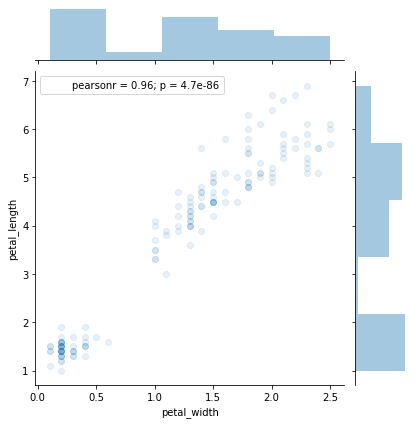

In [38]:
from scipy.stats import pearsonr
sns.jointplot(x='petal_width', y='petal_length', data=iris, alpha = 0.1, stat_func= pearsonr)
plt.show()

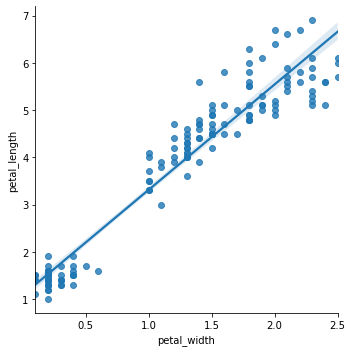

In [44]:
sns.lmplot(x='petal_width', y='petal_length', data=iris)
plt.show()

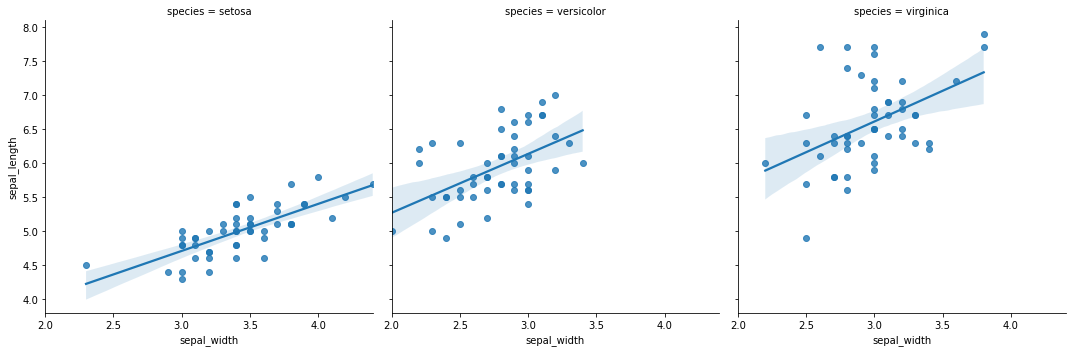

In [46]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?

sns.lmplot(x='sepal_width', y='sepal_length', col ='species', data=iris)
plt.show()

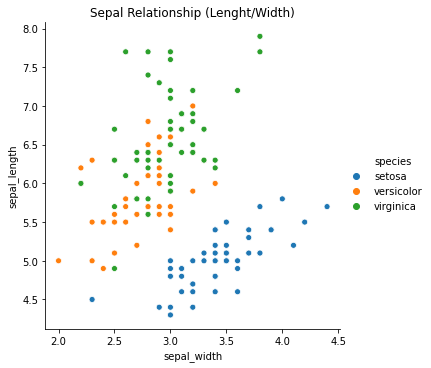

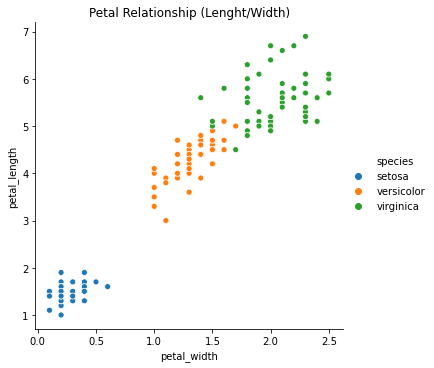

In [83]:
# 4. Which features would be best used to predict species?

sns.relplot(x="sepal_width", y="sepal_length", data=iris, hue="species")
plt.title('Sepal Relationship (Lenght/Width)')

sns.relplot(x="petal_width", y="petal_length", data=iris, hue="species")
plt.title('Petal Relationship (Lenght/Width)')
plt.show()

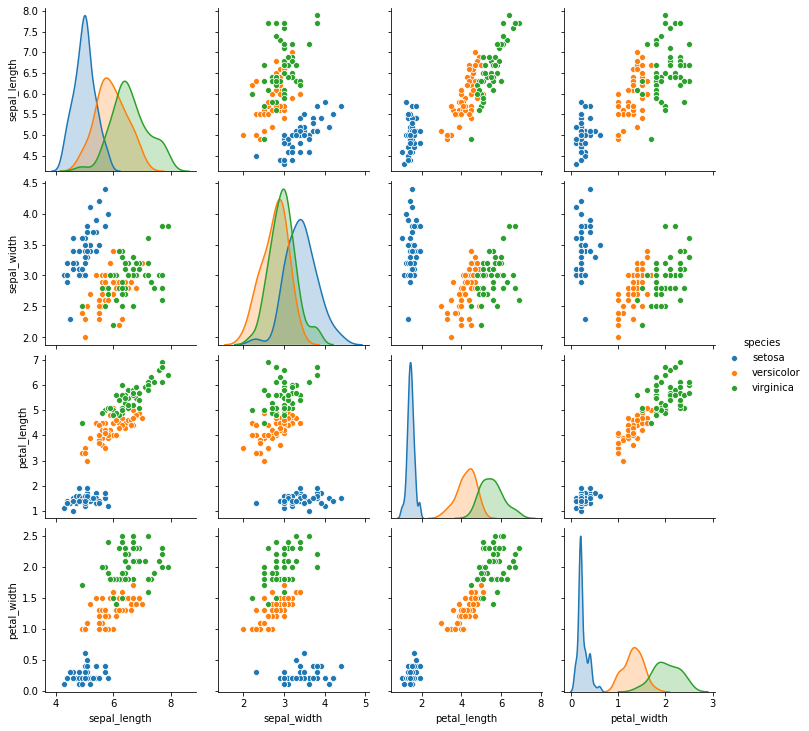

In [88]:
sns.pairplot(iris, hue = 'species')

In [106]:
# 1.Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

anscombe = sns.load_dataset('anscombe')
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [109]:
anscombe.info

<bound method DataFrame.info of    dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      

In [116]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [112]:
#   Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
#   What do you notice?

agg_data = anscombe.groupby('dataset').agg(['max', 'min', 'mean','std'])
agg_data

x                          y                          
          max  min mean       std    max   min      mean       std
dataset                                                           
I        14.0  4.0  9.0  3.316625  10.84  4.26  7.500909  2.031568
II       14.0  4.0  9.0  3.316625   9.26  3.10  7.500909  2.031657
III      14.0  4.0  9.0  3.316625  12.74  5.39  7.500000  2.030424
IV       19.0  8.0  9.0  3.316625  12.50  5.25  7.500909  2.030579

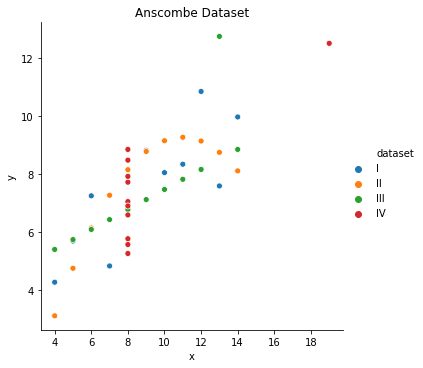

In [117]:
#   Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(x="x", y="y", data=anscombe, hue="dataset")
plt.title('Anscombe Dataset')
plt.show()

In [ ]:
# 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the 
#    effectiveness of the different insect sprays.



In [ ]:
# 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [ ]:
#  3a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is 
#      Catholic. (Choose a cutoff point for what constitutes catholic)


In [ ]:
#  3b. Does whether or not a province is Catholic influence fertility?


In [ ]:
#  3c. What measure correlates most strongly with fertility?


In [ ]:
# 4. Using the chipotle dataset from the previous exercise, 
#   create a bar chart that shows the 4 most popular items and the revenue produced by each.


In [ ]:
# 5. Load the sleepstudy data and read it's documentation. 
#   Use seaborn to create a line chart of all the individual subject's reaction times and a more 
#   prominant line showing the average change in reaction time.

